In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from io import StringIO

def extract_party_name(soup):
    span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)
    if span:
        party_name = span.text.split("(")[-1].split(")")[0].strip()
        return party_name
    return "Unknown"

def generate_excel_from_urls(url_filename_pairs, combined_filename):
    all_dfs = []
    for url, filename in url_filename_pairs:
        response = requests.get(url)
        html_content = response.content
        soup = BeautifulSoup(html_content, "html.parser")
        party_name = extract_party_name(soup)
        table = soup.find("table", class_="table")

        if table:
            dfs = pd.read_html(StringIO(str(table)))

            if dfs:
                df = dfs[0]
                df["Winning Party"] = party_name 
                df.to_excel(filename, index=False)
                all_dfs.append(df)
                print(f"Excel file generated successfully: {filename}")
            else:
                print(f"No tables found on the webpage for URL: {url}")
        else:
            print(f"Table not found on the webpage for URL: {url}")

    # Combine all dataframes into a single DataFrame
    combined_df = pd.concat(all_dfs, ignore_index=True)
    # Write the combined DataFrame to a single sheet in the Excel file
    combined_df.to_excel(combined_filename, sheet_name='Combined', index=False)
    
    print(f"Combined Excel file generated successfully: {combined_filename}")

# List of URLs, party names, and filenames for individual Excel files
url_partyname_filename_pairs = [
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-369.htm","table1_report.xlsx"),
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-742.htm", "table2_report.xlsx"),
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-1680.htm", "table3_report.xlsx"),
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-140.htm", "table4_report.xlsx"),
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-582.htm", "table5_report.xlsx"),
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-1745.htm", "table6_report.xlsx"),
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-805.htm", "table7_report.xlsx"),
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-3369.htm", "table8_report.xlsx"),
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-3620.htm", "table9_report.xlsx"),
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-3529.htm", "table10_report.xlsx"),
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-3165.htm", "table11_report.xlsx"),
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-1888.htm", "table12_report.xlsx"),
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-1420.htm",  "table13_report.xlsx"),
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-547.htm",  "table14_report.xlsx"),
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-772.htm",  "table15_report.xlsx"),
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-1.htm", "table16_report.xlsx"),
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-852.htm",  "table17_report.xlsx"),
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-860.htm",  "table18_report.xlsx"),
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-545.htm", "table19_report.xlsx"),
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-804.htm", "table20_report.xlsx"),
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-1847.htm", "table21_report.xlsx"),
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-544.htm",  "table22_report.xlsx"),
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-1458.htm", "table23_report.xlsx"),
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-834.htm",  "table24_report.xlsx"),
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-1998.htm","table25_report.xlsx"),
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-83.htm", "table26_report.xlsx"),
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-664.htm",  "table27_report.xlsx"),
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-911.htm", "table28_report.xlsx"),
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-1534.htm", "table29_report.xlsx"),
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-1142.htm",  "table30_report.xlsx"),
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-3388.htm",  "table31_report.xlsx"),
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-2757.htm",  "table32_report.xlsx"),
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-1584.htm","table33_report.xlsx"),
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-2484.htm", "table34_report.xlsx"),
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-3482.htm","table35_report.xlsx"),
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-1658.htm","table36_report.xlsx"),
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-1046.htm","table37_report.xlsx"),
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-2989.htm","table38_report.xlsx"),
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-2070.htm","table39_report.xlsx"),
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-160.htm","table40_report.xlsx"),
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-118.htm", "table41_report.xlsx"),
    ("https://results.eci.gov.in/PcResultGenJune2024/partywisewinresultState-743.htm", "table42_report.xlsx"),
]
combined_filename = "Final_Dataset.xlsx"
generate_excel_from_urls(url_partyname_filename_pairs, combined_filename)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22620\2245981851.py:7: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


Excel file generated successfully: table1_report.xlsx


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22620\2245981851.py:7: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


Excel file generated successfully: table2_report.xlsx


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22620\2245981851.py:7: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


Excel file generated successfully: table3_report.xlsx


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22620\2245981851.py:7: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


Excel file generated successfully: table4_report.xlsx


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22620\2245981851.py:7: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


Excel file generated successfully: table5_report.xlsx


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22620\2245981851.py:7: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


Excel file generated successfully: table6_report.xlsx


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22620\2245981851.py:7: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


Excel file generated successfully: table7_report.xlsx


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22620\2245981851.py:7: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


Excel file generated successfully: table8_report.xlsx


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22620\2245981851.py:7: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


Excel file generated successfully: table9_report.xlsx


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22620\2245981851.py:7: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


Excel file generated successfully: table10_report.xlsx


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22620\2245981851.py:7: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


Excel file generated successfully: table11_report.xlsx


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22620\2245981851.py:7: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


Excel file generated successfully: table12_report.xlsx


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22620\2245981851.py:7: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


Excel file generated successfully: table13_report.xlsx


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22620\2245981851.py:7: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


Excel file generated successfully: table14_report.xlsx


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22620\2245981851.py:7: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


Excel file generated successfully: table15_report.xlsx


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22620\2245981851.py:7: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


Excel file generated successfully: table16_report.xlsx


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22620\2245981851.py:7: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


Excel file generated successfully: table17_report.xlsx


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22620\2245981851.py:7: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


Excel file generated successfully: table18_report.xlsx


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22620\2245981851.py:7: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


Excel file generated successfully: table19_report.xlsx


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22620\2245981851.py:7: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


Excel file generated successfully: table20_report.xlsx


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22620\2245981851.py:7: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


Excel file generated successfully: table21_report.xlsx


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22620\2245981851.py:7: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


Excel file generated successfully: table22_report.xlsx


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22620\2245981851.py:7: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


Excel file generated successfully: table23_report.xlsx


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22620\2245981851.py:7: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


Excel file generated successfully: table24_report.xlsx


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22620\2245981851.py:7: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


Excel file generated successfully: table25_report.xlsx


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22620\2245981851.py:7: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


Excel file generated successfully: table26_report.xlsx


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22620\2245981851.py:7: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


Excel file generated successfully: table27_report.xlsx


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22620\2245981851.py:7: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


Excel file generated successfully: table28_report.xlsx


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22620\2245981851.py:7: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


Excel file generated successfully: table29_report.xlsx


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22620\2245981851.py:7: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


Excel file generated successfully: table30_report.xlsx


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22620\2245981851.py:7: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


Excel file generated successfully: table31_report.xlsx


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22620\2245981851.py:7: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


Excel file generated successfully: table32_report.xlsx


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22620\2245981851.py:7: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


Excel file generated successfully: table33_report.xlsx


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22620\2245981851.py:7: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


Excel file generated successfully: table34_report.xlsx


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22620\2245981851.py:7: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


Excel file generated successfully: table35_report.xlsx


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22620\2245981851.py:7: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


Excel file generated successfully: table36_report.xlsx


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22620\2245981851.py:7: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


Excel file generated successfully: table37_report.xlsx


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22620\2245981851.py:7: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


Excel file generated successfully: table38_report.xlsx


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22620\2245981851.py:7: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


Excel file generated successfully: table39_report.xlsx


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22620\2245981851.py:7: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


Excel file generated successfully: table40_report.xlsx


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22620\2245981851.py:7: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


Excel file generated successfully: table41_report.xlsx
Excel file generated successfully: table42_report.xlsx
Combined Excel file generated successfully: Final_Dataset.xlsx


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22620\2245981851.py:7: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  span = soup.find("span", text=lambda t: t and "Winning Candidate" in t)


In [3]:
import pandas as np 
import numpy as np 
data=pd.read_excel("Final_Dataset.xlsx")

In [4]:
data

,S.No,Parliament Constituency,Winning Candidate,Total Votes,Margin,Winning Party
0,1,Anakapalle(5),C.M.RAMESH,762069,296530,Bharatiya Janata Party
1,2,Rajahmundry(8),DAGGUBATI PURANDHESHWARI,726515,239139,Bharatiya Janata Party
2,3,Narsapuram(9),BHUPATHI RAJU SRINIVASA VARMA (B.J.P.VARMA),707343,276802,Bharatiya Janata Party
3,4,Arunachal West(1),KIREN RIJIJU,205417,100738,Bharatiya Janata Party
4,5,Arunachal East(2),TAPIR GAO,145581,30421,Bharatiya Janata Party
...,...,...,...,...,...,...
538,3,Khadoor Sahib(3),AMRITPAL SINGH,404430,197120,Independent
539,4,Faridkot(9),SARABJEET SINGH KHALSA,298062,70053,Independent
540,5,Daman & Diu (1),PATEL UMESHBHAI BABUBHAI,42523,6225,Independent
541,6,BARAMULLA(1),ABDUL RASHID SHEIKH,472481,204142,Independent


In [5]:
data.describe()

,S.No
count,543.000000
mean,65.769797
std,69.916031
min,1.000000
25%,8.000000
50%,35.000000
75%,104.500000
max,240.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   S.No                     543 non-null    int64 
 1   Parliament Constituency  543 non-null    object
 2   Winning Candidate        543 non-null    object
 3   Total Votes              543 non-null    object
 4   Margin                   543 non-null    object
 5   Winning Party            543 non-null    object
dtypes: int64(1), object(5)
memory usage: 25.6+ KB


In [7]:
df = pd.DataFrame(data)

# Check for null values across all columns
null_columns = df.columns[df.isnull().any()]

if null_columns.empty:
    print("No columns have null values.")
else:
    print("Columns with null values:")
    print(df[null_columns].isnull().sum())


No columns have null values.


In [8]:
df_filled = df.fillna(value="NULL")


In [9]:
null_columns = df.columns[df.isnull().sum()]
if null_columns.empty:
    print("No columns have null values.")
else:
    print("Columns with null values:")
    print(df[null_columns].isnull().sum())

Columns with null values:
S.No    0
S.No    0
S.No    0
S.No    0
S.No    0
S.No    0
dtype: int64


AttributeError: 'DataFrame' object has no attribute 'unique_parties'

1. Winning Parties:
This analysis identifies the parties that have won the most seats in the parliamentary elections. It helps understand which parties have the highest representation.Here BJP Won 240 seats,NDA was the Cross the Magic Figure to Form the Government. 

In [ ]:
import pandas as pd
import plotly.graph_objects as go
df = pd.DataFrame(data)
party_counts = df['Winning Party'].value_counts()
fig = go.Figure(data=[go.Bar(x=party_counts.index, y=party_counts.values)])
fig.update_layout(
    title='Number of Seats Won by Each Party',
    xaxis_title='Party',
    yaxis_title='Number of Seats'
)
fig.show()


2. Margin of Victory:
This insight highlights the constituencies with the largest and smallest margins of victory, providing context on the competitiveness of elections in different areas.

In [ ]:
# Constituency with the largest margin of victory
max_margin_idx = df['Margin'].idxmax()
max_margin_constituency = df.loc[max_margin_idx, 'Parliament Constituency']
max_margin_value = df.loc[max_margin_idx, 'Margin']

# Constituency with the smallest margin of victory
min_margin_idx = df['Margin'].idxmin()
min_margin_constituency = df.loc[min_margin_idx, 'Parliament Constituency']
min_margin_value = df.loc[min_margin_idx, 'Margin']

print(f"Largest Margin of Victory: {max_margin_constituency} with {max_margin_value} votes")
print(f"Smallest Margin of Victory: {min_margin_constituency} with {min_margin_value} votes")


Largest Margin of Victory: INDORE(26) with 1175092.0 votes
Smallest Margin of Victory: Mumbai North West(27) with 48.0 votes


3. Total Votes Analysis
This analysis gives an overview of the total number of votes received by each winning party, indicating their overall popularity and support.

In [ ]:

df = pd.DataFrame(data)

# Calculate total votes received by each winning party
total_votes_by_party = df.groupby('Winning Party')['Total Votes'].sum().reset_index()

# Sort by total votes descending for better visualization
total_votes_by_party = total_votes_by_party.sort_values(by='Total Votes', ascending=False)

# Create Plotly horizontal bar chart
fig = go.Figure(go.Bar(
    x=total_votes_by_party['Total Votes'],
    y=total_votes_by_party['Winning Party'],
    orientation='h'  # Horizontal orientation
))

# Customize layout
fig.update_layout(
    title='Total Votes Received by Each Winning Party',
    xaxis_title='Total Votes',
    yaxis_title='Winning Party',
    yaxis_categoryorder='total ascending',  # Sort by total votes ascending
    height=600,  # Adjust height as needed for better viewing
    margin=dict(l=1),  # Adjust left margin for longer party names
)

# Show interactive plot
fig.show()


4. Party Performance: It shows the Total votes Recevied,Total Margin , Total No of seats Won are shown.

In [ ]:

df = pd.DataFrame(data)

# Calculate total votes and average margin for each winning party
party_comparison = df.groupby('Winning Party').agg({
    'Total Votes': 'sum',
    'Margin': 'mean',
    'Parliament Constituency': 'size'  # Count the number of constituencies won by each party
})

# Rename the size column to Total Seats Won
party_comparison.rename(columns={'Parliament Constituency': 'Total Seats Won'}, inplace=True)

# Print party comparison analysis
print("Party Comparison:")
print(party_comparison)


Party Comparison:
                                                  Total Votes         Margin  \
Winning Party                                                                  
AJSU Party                                           451139.0   80880.000000   
Aam Aadmi Party                                      981161.0   75839.000000   
All India Majlis-E-Ittehadul Muslimeen               661981.0  338087.000000   
All India Trinamool Congress                       20185370.0  169343.551724   
Asom Gana Parishad                                   860113.0  222351.000000   
Bharat Adivasi Party                                 820831.0  247054.000000   
Bharatiya Janata Party                            157039540.0  192809.774059   
Communist Party of India                             937783.0  167442.500000   
Dravida Munnetra Kazhagam                          11754710.0  230981.000000   
Independent                                         2421977.0   89900.285714   
Indian National Congre

5. Top Performance: Print the Details of Candidate with Highest Margin and Highest Total Votes.

In [ ]:

df = pd.DataFrame(data)

# Candidate with highest margin
highest_margin_candidate = df.loc[df['Margin'].idxmax()]

# Candidate with highest total votes
highest_votes_candidate = df.loc[df['Total Votes'].idxmax()]

# Print details of highest margin candidate
print("Details of Candidate with Highest Margin:")
print(highest_margin_candidate)

print("\n")

# Print details of candidate with highest total votes
print("Details of Candidate with Highest Total Votes:")
print(highest_votes_candidate)

Details of Candidate with Highest Margin:
Parliament Constituency                INDORE(26)
Winning Candidate                 SHANKAR LALWANI
Total Votes                             1226751.0
Margin                                  1175092.0
Winning Party              Bharatiya Janata Party
Name: 104, dtype: object


Details of Candidate with Highest Total Votes:
Parliament Constituency                  Dhubri (2)
Winning Candidate                   RAKIBUL HUSSAIN
Total Votes                               1471885.0
Margin                                    1012476.0
Winning Party              Indian National Congress
Name: 240, dtype: object


6.  Details Uncontested elections: Only one Candidate was Participated and unanimous winning 

In [ ]:
df = pd.DataFrame(data)
# Filter records where Margin is NULL and select specific columns
null_margin_records = df[df['Margin'].isnull()][['Parliament Constituency', 'Winning Candidate', 'Winning Party']]

print("Details of Records Where No Opposition Candidate was there:")
print(null_margin_records)


Details of Records Where No Opposition Candidate was there:
   Parliament Constituency                             Winning Candidate  \
49               Surat(24)  MUKESHKUMAR CHANDRAKAANT DALAL (Uncontested)   

             Winning Party  
49  Bharatiya Janata Party  


7. Distribution of Victory Margins: The distribution of total votes shows that most constituencies have a moderate number of votes, with a few having exceptionally high vote counts.

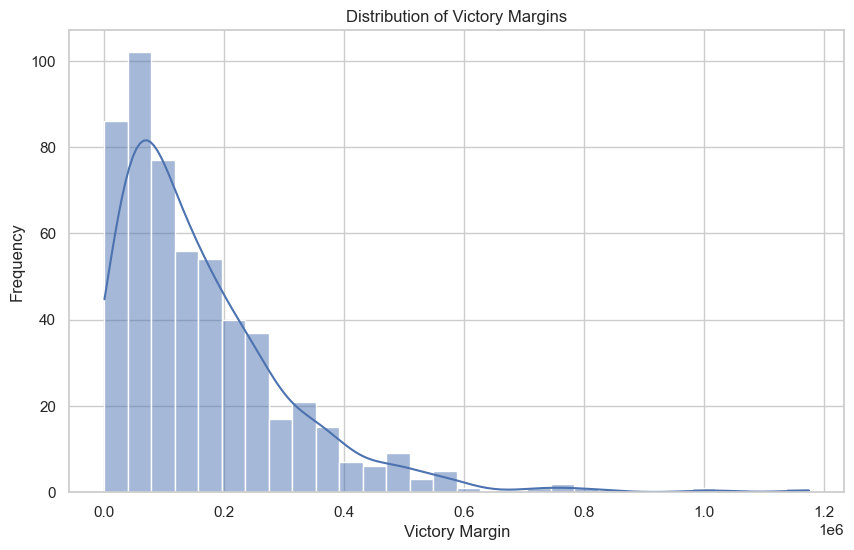

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Margin'], kde=True, bins=30)
plt.title('Distribution of Victory Margins')
plt.xlabel('Victory Margin')
plt.ylabel('Frequency')
plt.show()

8. Average Victory Margin by Party: The Bharatiya Janata Party (BJP) dominates the election, as shown by the party-wise distribution of winning candidates.

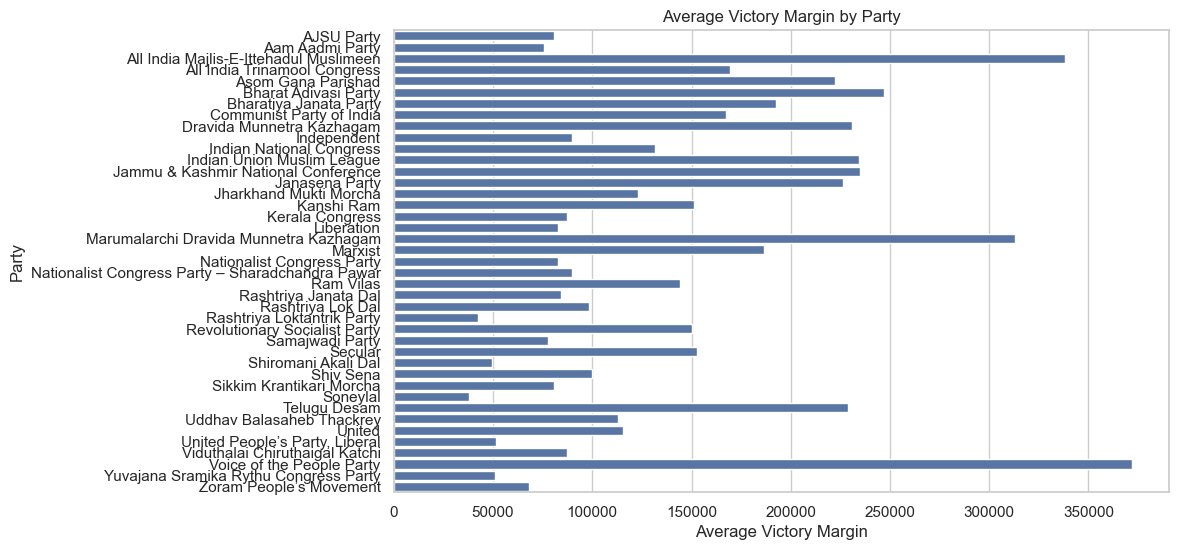

In [ ]:

avg_margin_by_party = data.groupby('Winning Party')['Margin'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Margin', y='Winning Party', data=avg_margin_by_party)
plt.title('Average Victory Margin by Party')
plt.xlabel('Average Victory Margin')
plt.ylabel('Party')
plt.show()

9. Comparison of Vote Shares Among Top Parties: The comparison of vote shares among the top parties shows significant variation in total votes received by different parties.

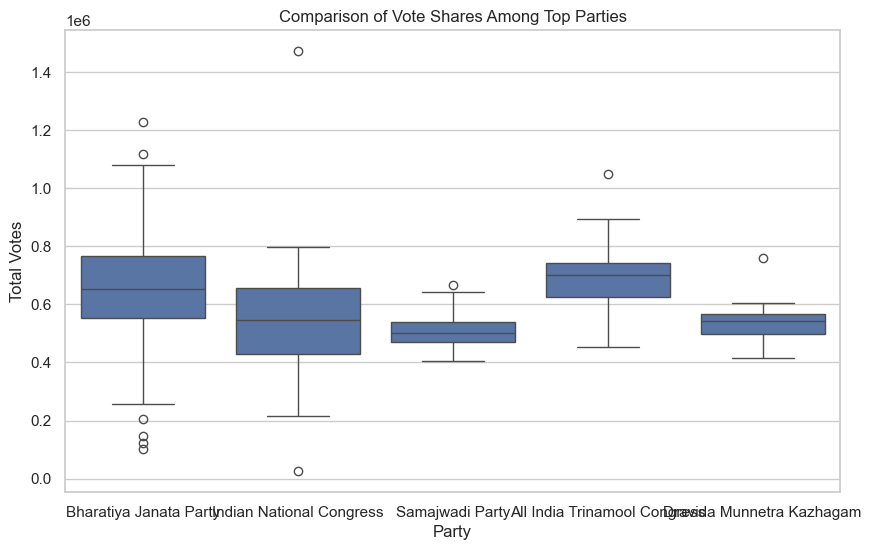

In [ ]:
top_parties = data['Winning Party'].value_counts().nlargest(5).index
filtered_data = data[data['Winning Party'].isin(top_parties)]
plt.figure(figsize=(10, 6))
sns.boxplot(x='Winning Party', y='Total Votes', data=filtered_data)
plt.title('Comparison of Vote Shares Among Top Parties')
plt.xlabel('Party')
plt.ylabel('Total Votes')
plt.show()

10. Relation Between Votes and margin: There is a positive correlation between the total votes and the victory margin, indicating that higher total votes tend to result in larger victory margins.

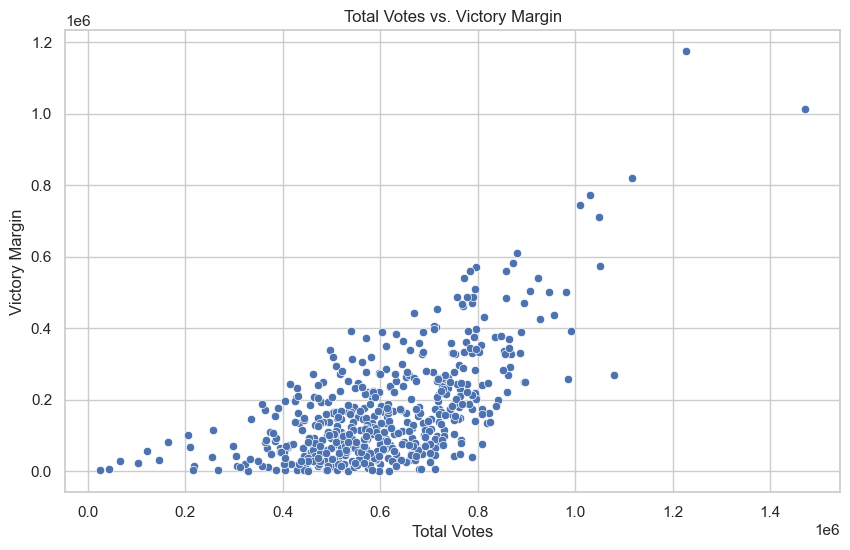

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.DataFrame(data)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Votes', y='Margin', data=df)
plt.title('Total Votes vs. Victory Margin')
plt.xlabel('Total Votes')
plt.ylabel('Victory Margin')
plt.grid(True)
plt.show()